In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Data Exploration and Preparation

In [140]:
df = pd.read_csv("watson_healthcare_modified.csv")
df

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,1117656,26,Yes,Travel_Rarely,471,Neurology,24,3,Technical Degree,1,...,2,80,0,1,3,1,1,0,0,0
1672,1152327,46,No,Travel_Rarely,1125,Cardiology,10,3,Marketing,1,...,3,80,1,15,3,3,3,2,1,2
1673,1812428,20,No,Travel_Rarely,959,Maternity,1,3,Life Sciences,1,...,4,80,0,1,0,4,1,0,0,0
1674,1812429,39,No,Travel_Rarely,466,Neurology,1,1,Life Sciences,1,...,3,80,1,21,3,3,21,6,11,8


In [9]:
df_t = pd.read_csv("watson_shap_values_for_testset.csv")
df_t

,EmployeeID,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,ShiftSchedule,State,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,10011,-0.082934,-0.049007,0.033110,-0.052101,-0.094783,-0.007782,-0.056123,0,-0.106410,...,0.109181,-0.195666,0.056648,0.011107,-0.017621,-0.000377,-0.032997,0.003732,-0.042552,-0.120689
1,10012,-0.061724,-0.185156,0.004095,-0.055188,-0.063846,-0.032673,-0.057622,0,-0.025947,...,-0.035909,-0.169545,0.043217,0.079458,-0.052512,-0.043295,0.060303,0.016709,-0.037952,0.152560
2,10013,0.006087,-0.057510,0.017782,-0.002091,-0.008152,-0.028928,-0.070993,0,-0.042936,...,-0.038788,-0.169869,0.099417,-0.009016,-0.046488,-0.080971,-0.022697,0.007191,-0.037359,-0.110958
3,10014,-0.012834,0.242323,-0.044950,-0.039829,-0.133996,-0.034905,-0.051805,0,-0.053241,...,-0.024949,0.165522,0.033103,-0.006922,-0.044399,-0.036111,-0.074827,-0.025470,0.004950,-0.036003
4,10015,-0.035391,-0.023601,0.014274,0.015462,-0.138073,0.007920,0.052945,0,-0.072430,...,-0.022945,0.126107,0.101879,-0.028295,-0.055819,-0.049084,-0.013705,0.011744,-0.039383,-0.054550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,10212,-0.039493,-0.034747,-0.044727,-0.022448,-0.117214,0.029679,-0.013860,0,-0.049312,...,-0.058096,-0.161909,-0.030475,-0.034089,-0.044657,-0.042839,-0.041159,-0.042855,-0.054734,-0.049729
202,10213,-0.091602,-0.053394,-0.107608,-0.053622,-0.109185,-0.012358,-0.083148,0,-0.023243,...,-0.028543,-0.160014,-0.005274,-0.015650,-0.028211,-0.015259,-0.041551,-0.032326,0.159189,-0.051259
203,10214,0.249557,-0.104146,0.015778,-0.091577,0.014157,0.022667,-0.102058,0,0.301851,...,-0.012861,0.224978,-0.058046,0.083066,0.003723,0.042219,0.120966,0.033763,-0.022962,0.393495
204,10215,-0.015204,-0.034563,-0.025504,-0.055249,-0.047021,0.015875,-0.072875,0,-0.042504,...,-0.041672,0.102638,0.077688,-0.035025,-0.009765,-0.055626,-0.028669,-0.031676,0.194487,-0.073237


We have two sets of data given, as shown above. 

**watson_healthcare_modified.csv**:<br>
This dataset contains raw data, Column names include EmployeeID, Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, etc. EmployeeCount, etc. The Attrition column indicates whether the employee is leaving (Yes/No).

**watson_shap_values_for_testset.csv**:<br>
The data in this dataset has been numerically transformed, possibly to explain the Shapley Additive Explanations (SHAPs) predicted by the model. SHAP values are used to explain the contribution of features in the machine learning model to the predicted results.

**Check our understanding of the relationship is correct**:

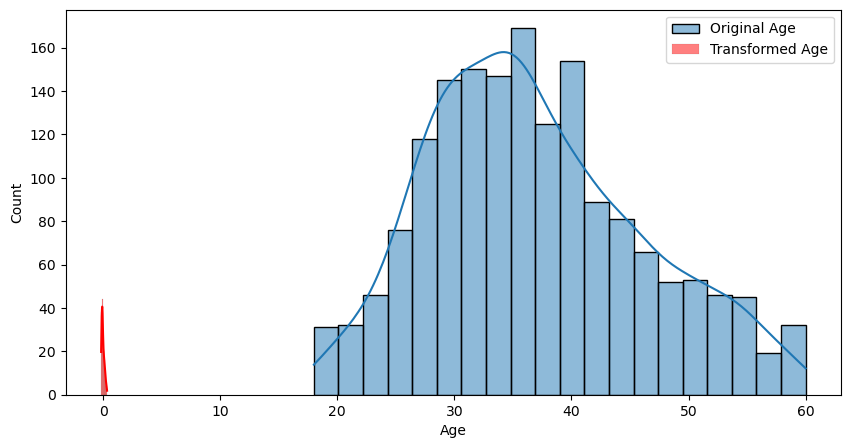

In [22]:
plt.figure(figsize=(10, 5))
sns.histplot(df["Age"], kde=True, label="Original Age")
sns.histplot(df_t["Age"], kde=True, label="Transformed Age", color="red")
plt.legend()
plt.show()

### Examing and Preprocessing data
#### a) Unique values for each column

In [23]:
df.nunique()

EmployeeID                  1676
Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        5
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
Shift                          4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

We figure out 
- EmployeeCount is always 1
- StandardHours is always 80
- Over18 is always Yes <br>

So we consider that they are not informative enough to be in the model, and we drop them.

In [24]:
df.drop(['Over18','StandardHours', 'EmployeeCount'], axis = 1, inplace = True)
df.head()

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,2,...,3,1,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,3,...,4,4,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,4,...,3,2,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,4,...,3,3,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,3,4,1,6,3,3,2,2,2,2


#### b) Missing Values

In [25]:
missing_values = df.isnull().sum()
missing_values

EmployeeID                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
Shift                       0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

## 2. EDA

Note that we are using the original data (**df**, watson_healthcare_modified.csv) for EDA.

In our EDA, we include

a) Attrition Distribution<br>
b) Demographic Factors vs. Attrition<br>
c) Job-Related Factors vs. Attrition<br>
d) Satisfaction & Work-Life Balance vs. Attrition<br>
e) Compensation & Financial Factors vs. Attrition

### a) Attrition distribution

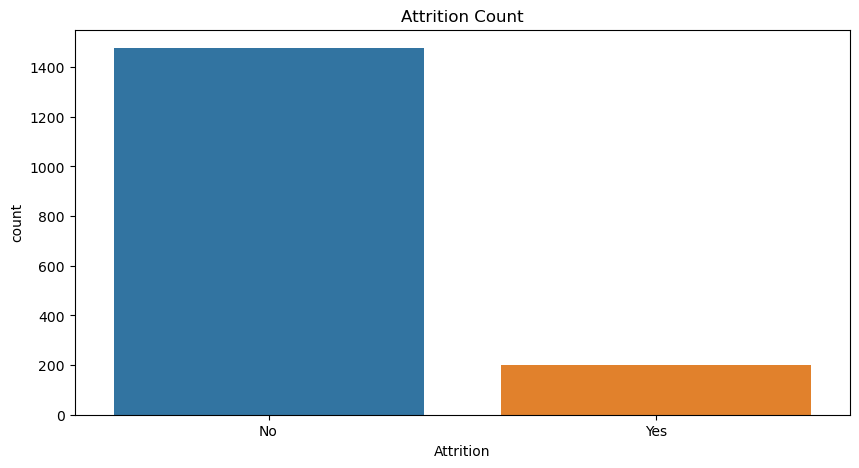

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(x="Attrition", data=df)
plt.title("Attrition Count")
plt.show()

### b) Demographic Factors vs. Attrition

**Analyzing the impact of age, education level, gender, and marital status on employee attrition.**

Text(0.5, 1.0, 'Marital Status vs Attrition')

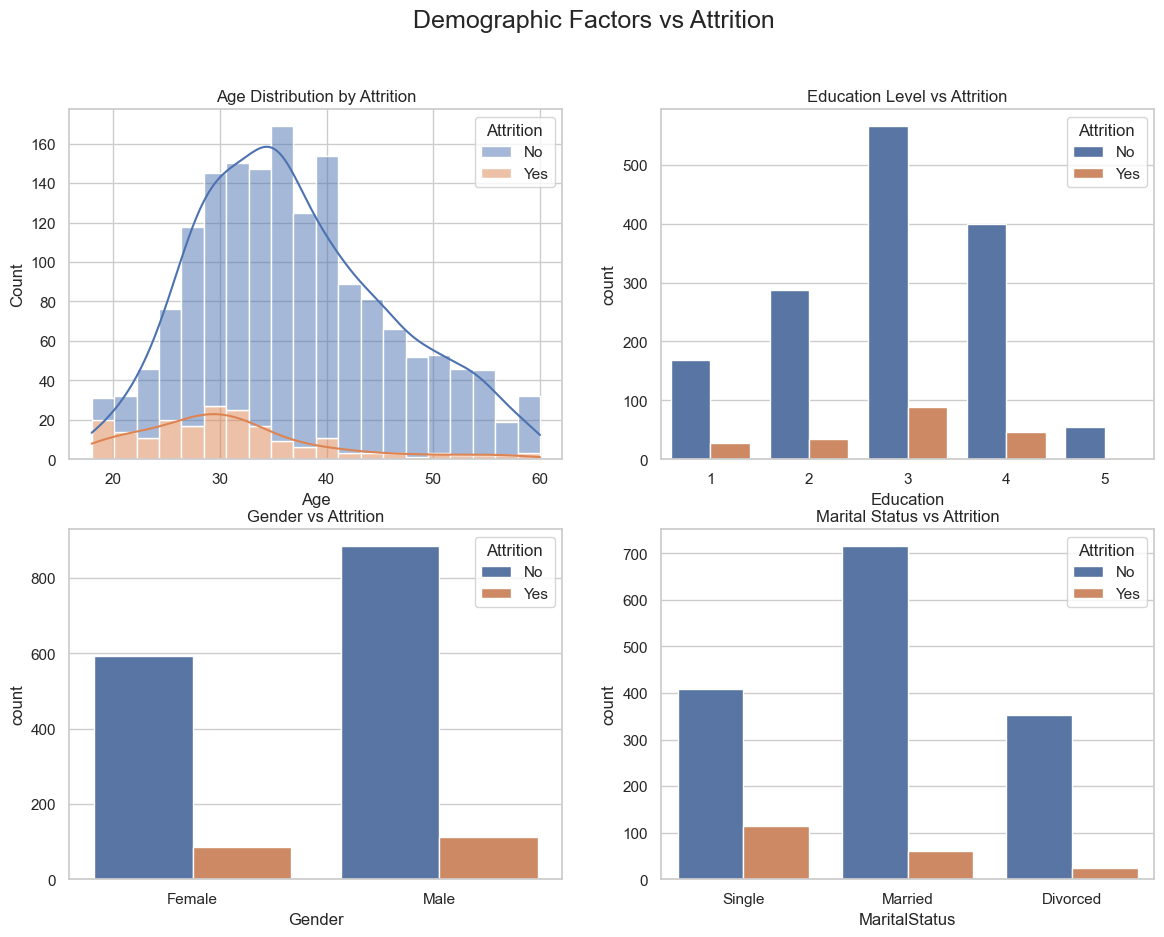

In [32]:
fig_demographic, dem_axes = plt.subplots(2, 2, figsize=(14, 10))
fig_demographic.suptitle("Demographic Factors vs Attrition", fontsize=18)

sns.histplot(df, x="Age", hue="Attrition", multiple="stack", kde=True, ax=dem_axes[0, 0])
dem_axes[0, 0].set_title("Age Distribution by Attrition")

sns.countplot(x="Education", hue="Attrition", data=df, ax=dem_axes[0, 1])
dem_axes[0, 1].set_title("Education Level vs Attrition")

sns.countplot(x="Gender", hue="Attrition", data=df, ax=dem_axes[1, 0])
dem_axes[1, 0].set_title("Gender vs Attrition")

sns.countplot(x="MaritalStatus", hue="Attrition", data=df, ax=dem_axes[1, 1])
dem_axes[1, 1].set_title("Marital Status vs Attrition")

**Takeaways:**

- Age: Younger employees tend to have a higher attrition rate, particularly those under 35.
- Education Level: No clear trend between education level and attrition, suggesting that education may not be a strong predictor.
- Gender: Both male and female employees show similar attrition rates, indicating gender is not a significant factor.
- Marital Status: Single employees exhibit a higher attrition rate compared to married or divorced employees.

### 2. Job-Related Factors vs. Attrition

**Examining the relationship between department, business travel frequency, and attrition rates.**

Text(0.5, 1.0, 'Business Travel vs Attrition')

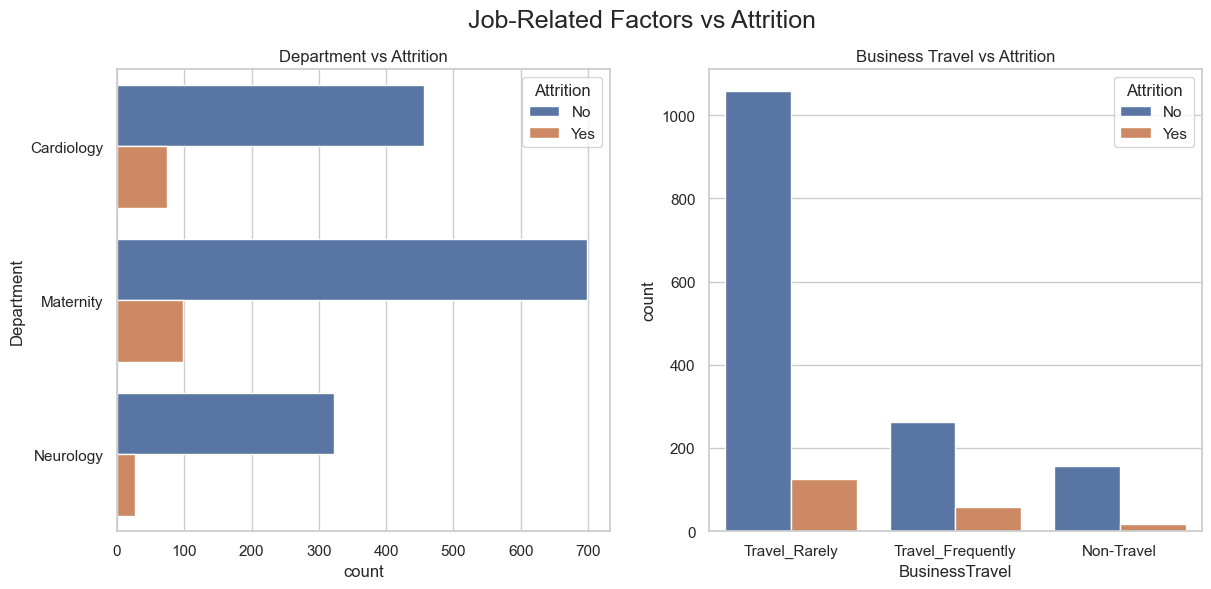

In [33]:
fig_job, job_axes = plt.subplots(1, 2, figsize=(14, 6))
fig_job.suptitle("Job-Related Factors vs Attrition", fontsize=18)

sns.countplot(y="Department", hue="Attrition", data=df, ax=job_axes[0])
job_axes[0].set_title("Department vs Attrition")

sns.countplot(x="BusinessTravel", hue="Attrition", data=df, ax=job_axes[1])
job_axes[1].set_title("Business Travel vs Attrition")

**Takeaways:**

- Department: Some departments, such as Cardiology and Maternity, have higher attrition rates, potentially due to work conditions or job demands.
- Business Travel: Employees who travel frequently for work tend to have slightly higher attrition, indicating travel-related stress might contribute to turnover.

### 3. Satisfaction & Work-Life Balance vs. Attrition

**Investigating how job satisfaction and work-life balance influence employee attrition.**

Text(0.5, 1.0, 'Work-Life Balance Distribution by Attrition')

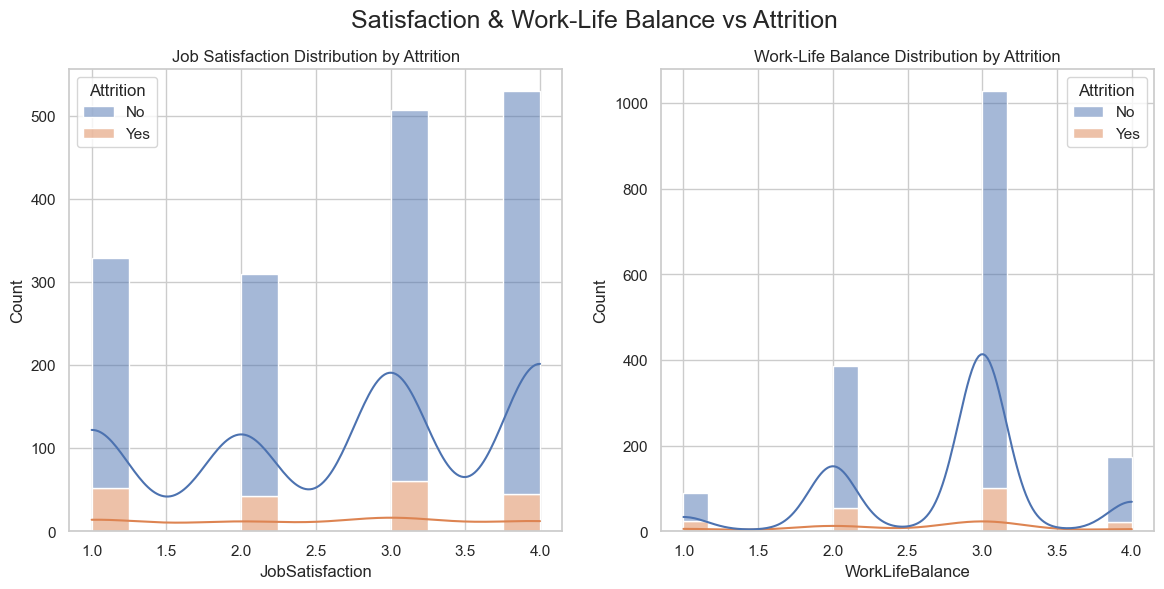

In [34]:
fig_satisfaction, sat_axes = plt.subplots(1, 2, figsize=(14, 6))
fig_satisfaction.suptitle("Satisfaction & Work-Life Balance vs Attrition", fontsize=18)

sns.histplot(df, x="JobSatisfaction", hue="Attrition", multiple="stack", kde=True, ax=sat_axes[0])
sat_axes[0].set_title("Job Satisfaction Distribution by Attrition")

sns.histplot(df, x="WorkLifeBalance", hue="Attrition", multiple="stack", kde=True, ax=sat_axes[1])
sat_axes[1].set_title("Work-Life Balance Distribution by Attrition")


**Takeaways**:

- Job Satisfaction: Employees with lower job satisfaction scores are more likely to leave, confirming its strong correlation with attrition.
- Work-Life Balance: Employees who report poor work-life balance have higher attrition rates, highlighting its importance in retention.

### 4. Compensation & Financial Factors vs. Attrition

**Exploring the effects of salary, salary hikes, hourly rate, and daily rate on employee attrition.**

Text(0.5, 1.0, 'Daily Rate vs Attrition')

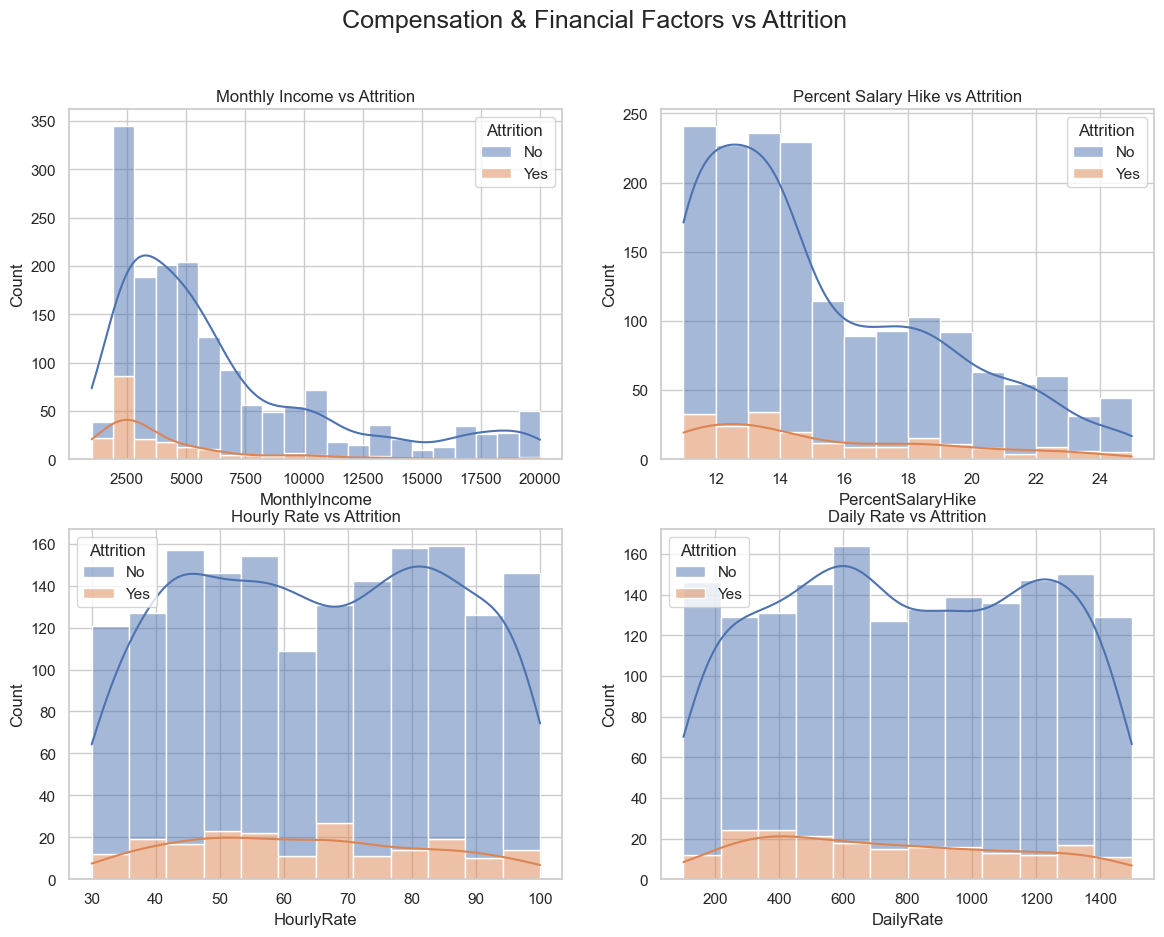

In [36]:
fig_salary, sal_axes = plt.subplots(2, 2, figsize=(14, 10))
fig_salary.suptitle("Compensation & Financial Factors vs Attrition", fontsize=18)

sns.histplot(df, x="MonthlyIncome", hue="Attrition", multiple="stack", kde=True, ax=sal_axes[0, 0])
sal_axes[0, 0].set_title("Monthly Income vs Attrition")

sns.histplot(df, x="PercentSalaryHike", hue="Attrition", multiple="stack", kde=True, ax=sal_axes[0, 1])
sal_axes[0, 1].set_title("Percent Salary Hike vs Attrition")

sns.histplot(df, x="HourlyRate", hue="Attrition", multiple="stack", kde=True, ax=sal_axes[1, 0])
sal_axes[1, 0].set_title("Hourly Rate vs Attrition")

sns.histplot(df, x="DailyRate", hue="Attrition", multiple="stack", kde=True, ax=sal_axes[1, 1])
sal_axes[1, 1].set_title("Daily Rate vs Attrition")

**Takeaways**:

- Monthly Income: Lower-income employees tend to leave more frequently, suggesting salary plays a role in retention.
- Salary Hike %: Employees with smaller salary increases over time show slightly higher attrition, indicating financial incentives impact retention.
- Hourly & Daily Rates: No clear trend observed, implying that absolute salary figures might be more relevant than per-hour or per-day earnings.

## Encode and Split the Dataset

We will focus on the strongest predictive factors based on the results generated from EDA:

- Strongly relevant: Age, Marital Status, Department, Overtime, Job Satisfaction, and Work-Life Balance
- Moderately relevant: Monthly Income, Salary Increase
- Weakly relevant: Gender, Education Level, Hourly Rate, and Daily Rate

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

df = df.drop(["EmployeeID","Education", "EmployeeCount", "Gender", "Over18", "HourlyRate", "DailyRate"], axis=1)
# Encode categorical features
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Define X (features) and y (target variable - attition)
X = df.drop(columns=["Attrition"])  
y = df['Attrition']
X

,Age,BusinessTravel,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,JobSatisfaction,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,0,1,1,2,3,2,2,4,...,1,80,0,8,0,1,6,4,0,5
1,49,1,1,8,1,3,2,2,3,2,...,4,80,1,10,3,3,10,7,1,7
2,37,2,1,2,4,4,2,1,2,3,...,2,80,0,7,3,3,0,0,0,0
3,33,1,1,3,1,4,3,1,3,3,...,3,80,0,8,3,3,8,7,3,0
4,27,2,1,2,3,1,3,1,2,2,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,26,2,2,24,5,3,1,1,2,4,...,2,80,0,1,3,1,1,0,0,0
1672,46,2,0,10,2,3,2,3,2,4,...,3,80,1,15,3,3,3,2,1,2
1673,20,2,1,1,1,4,2,1,3,2,...,4,80,0,1,0,4,1,0,0,0
1674,39,2,2,1,1,4,2,4,4,4,...,3,80,1,21,3,3,21,6,11,8


In [146]:
# Split dataset (70% Train, 30% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

For the section above, we have encoded categorical features and normalized numerical features which helps ensure data is clean and ready for modelling. 

## Supervised Learning

We will train different machine learning models to predict employee attrition and compare their performances.

## Random Forest

In [148]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train random forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


# Generate predictions
rf_preds = rf.predict(X_test)

# Evaluate model performance
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))
print("Classification Report:\n", classification_report(y_test, rf_preds))

Random Forest Accuracy: 0.9105367793240556
Confusion Matrix:
 [[437   6]
 [ 39  21]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95       443
           1       0.78      0.35      0.48        60

    accuracy                           0.91       503
   macro avg       0.85      0.67      0.72       503
weighted avg       0.90      0.91      0.90       503



From Class 0, we can derive that:
- 92% of employees predicted as "No Attrition" were actually not leaving
- The model correctly identifies 99% of the "No Attrition" cases.
- The percentage 95% of the f1-score shows strong balance between precision & recall.

From Class 1, we can derive that:
- 78% of predicted attrition cases are correct.
- The model only identifies 35% of actual "Attrition" cases which suggests that it misses 65% of employees who actually left
- The percentage 48% of the f1-score shows weaker balance(trade-off) between precision & recall.

 Overall, based on the generated evaluation, the accuracy of the model appears to be around 0.91 which suggests that the model correctly predicts 91.5% of all the cases and is good at identifying employees who will stay. Besides, class 0(No attrition) shows stronger performance compared to class 1(Attrition). However, the low score of recall suggests that most employees who leave are not identified. The class imbalance shown in the support also makes the model biased toward predicting "No Attrition."

## Logistic Regression

In [154]:
from sklearn.linear_model import LogisticRegression

# Train logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions
logreg_preds = logreg.predict(X_test)

# Evaluate model performance
print("Logistic Regression Accuracy:", accuracy_score(y_test, logreg_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, logreg_preds))

Logistic Regression Accuracy: 0.9324055666003976
Confusion Matrix:
 [[434   9]
 [ 24  36]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       443
           1       0.81      0.57      0.67        60

    accuracy                           0.93       503
   macro avg       0.88      0.77      0.81       503
weighted avg       0.93      0.93      0.93       503



From Class 0, we can derive that:

- 94% of employees predicted as "No Attrition" were actually not leaving
- The model correctly identifies 98% of the "No Attrition" cases.
- The percentage 96% of the f1-score shows strong balance between precision & recall.

From Class 1, we can derive that:
- 81% of predicted attrition cases are correct, suggesting that when predicting attrition, 80% of the flagged employees truly left.
- The model only identifies 57% of actual "Attrition" cases which suggests that it misses 43% of employees who actually left
- The percentage 67% of the f1-score appears to be decent while it still could be improved.

Overall, the model performs higher accuracy of around 93.2%, especially for predicting employees who stay while the attrition predictions, especially for the recall value could be improved. Besides, according to the confusion matrix, since it appears to generate more false negatives compared to the previous model, reducing false negatives can therefore possibly help improve the model performance. 

## K Means Clustering

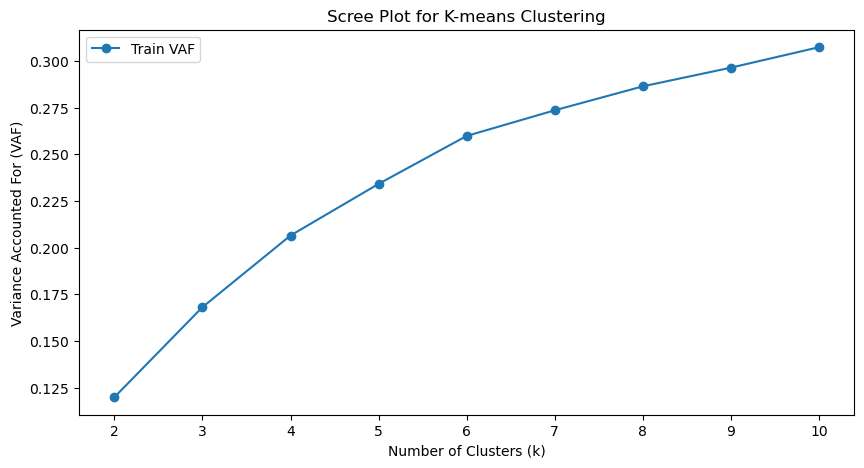

In [178]:
kmeans_results_train = {}
kmeans_results_test = {}
vaf_scores_train = []
vaf_scores_test = []

for k in range(2, 11):
    kmeans_train = KMeans(n_clusters=k, n_init=100, random_state=42)
    kmeans_train.fit(X_train)
    kmeans_results_train[k] = kmeans_train

    # Compute VAF for train
    sse_train = kmeans_train.inertia_  
    total_variance_train = np.var(X_train, axis=0).sum() * X_train.shape[0]  
    r2_train = 1 - (sse_train / total_variance_train)
    vaf_scores_train.append(r2_train)
    
    kmeans_test = KMeans(n_clusters=k, init=kmeans_train.cluster_centers_, n_init=1, random_state=42)
    kmeans_test.fit(X_test)
    kmeans_results_test[k] = kmeans_test

    # Compute VAF for test 
    sse_test = kmeans_test.inertia_
    total_variance_test = np.var(X_test, axis=0).sum() * X_test.shape[0]
    r2_test = 1 - (sse_test / total_variance_test)
    vaf_scores_test.append(r2_test)

# Plot VAF(R-squared) scores
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), vaf_scores_train, marker='o', linestyle='-', label='Train VAF')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Variance Accounted For (VAF)')
plt.title('Scree Plot for K-means Clustering')
plt.legend()
plt.show()

  From the plot, based on the elbow method, we can derive the optimal k equals to 6. 

In [175]:
optimal_k = 6  
print(f"Train VAF: {vaf_scores_train[optimal_k - 2]:.4f}")
print(f"Test VAF: {vaf_scores_test[optimal_k - 2]:.4f}")

Train VAF: 0.2599
Test VAF: 0.2734


Based on the generated results, the clusters explain a moderate amount of variance in the data while it is not suitable for direct prediction of attrition.